# Pollution Dynamics Though Weeks
### Exploratory Data Analysis of pollution in Seoul

In this analysis we are going to address the change of pollution though different days of week and we try to understand, what something as simple as gas levels can tell about a city and culture.

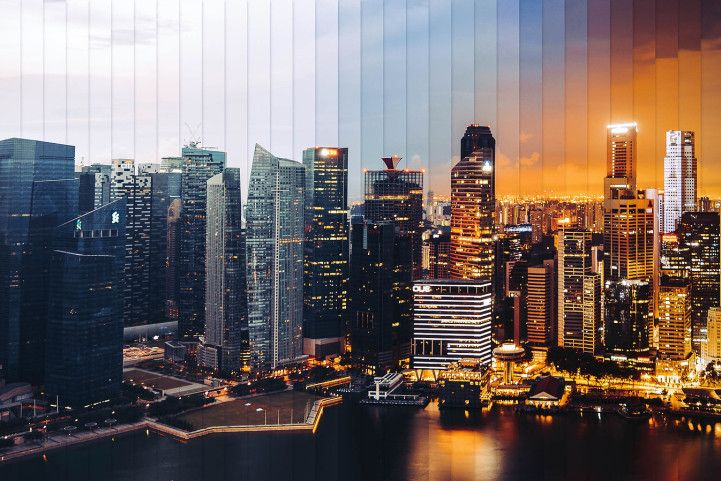

## Importing Libraries and Extracting data

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
pol_df = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv')
item_df = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_item_info.csv')  

In [ ]:
print (pol_df.info())
print (item_df.info())

In [ ]:
pol_df.head()

## Preprocessing - Cleaning The Data

Some values of the measure are set as -1, which are set to replace the abscense of data. We need to delete those rows.

In [ ]:
pol_df[pol_df.SO2 < 0].head()

In [ ]:
pol_df = pol_df[pol_df.SO2 > 0]
pol_df[pol_df.SO2 < 0].head()

## Extracting Timestamp For Measurement Date

The date and time is extract from string into timestamp format. Timestamp module of pandas can also be used to extract timestamp.

In [ ]:
pol_df['year'] = pol_df['Measurement date'].str.split('-').str.get(0)
pol_df['month'] = pol_df['Measurement date'].str.split('-').str.get(1)
pol_df['datetime'] = pol_df['Measurement date'].str.split('-').str.get(2)
pol_df['date'] = pol_df['datetime'].str.split(' ').str.get(0) 
pol_df['time'] = pol_df['datetime'].str.split(' ').str.get(1)
pol_df['hour'] = pol_df['time'].str.split(':').str.get(0)
pol_df = pol_df.drop(columns = ['time','datetime'])

In [ ]:
pol_df = pol_df.drop(columns = ['Address'])
pol_df.head(3)

In [ ]:
# week = pd.Timestamp(year = 2017,  month = 11 , day = 23).weekday()
pol_df['Day'] = pol_df['Measurement date'] = pd.to_datetime(pol_df['Measurement date'])

pol_df['Day'] = pol_df['Day'].dt.weekday
pol_df['Date'] = pol_df['Measurement date'].dt.date

In [ ]:
measure = pol_df.drop(columns= ['Measurement date', 'hour', 'date', 'month'])
measure.head()

In [ ]:
measure_weekly = pd.DataFrame(columns = ['Date' ,'Latitude', 'Longitude','SO2',  'NO2', 'CO', 'PM10', 'PM2.5', 'Day'])
codes = pd.unique(measure['Station code'])
dates = pd.unique(measure['Date'])
grouped = measure.groupby(by = 'Station code')
arr1 = []
arr2 = []
for code in codes:
    dbf = grouped.get_group(code)
    mean1 = dbf.groupby(by = 'Date').mean()
    arr1.append(mean1)
    mean2 = dbf.groupby(by = 'Day').mean()
    arr2.append(mean2)
weekday_dict = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}            
everyday = pd.concat(arr1,ignore_index=False)
weekday_avg = pd.concat(arr2,ignore_index=False)

# everyday['Day'] = everyday['Day'].replace(weekday_dict)

everyday.head()

In [ ]:
everyday.head(10)

In [ ]:
station_avg = measure.groupby(by = 'Station code').mean()
station_avg = station_avg.drop(columns = ['Day'])
station_avg.head(5)

In [ ]:
station_avg['Code'] = codes

In [ ]:
plt.figure(figsize = [15,8])
sns.barplot(x= 'Code', y='SO2' , data = station_avg)
plt.plot()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,12), sharex=True, constrained_layout=True)
fig.suptitle('Pollutant concentrations NO2, CO2, and O3 along the week', fontsize=16, fontweight='bold')
sns.lineplot(x='Day', y='SO2', data= everyday, ax=ax1)
sns.lineplot(x='Day', y='NO2', data=everyday, ax=ax2)
sns.lineplot(x='Day', y='O3', data= everyday, ax= ax3)
plt.plot()

## Observation 
#### These gases are increased with every week start, and slowly tend to decrease towards weekends.Though ozone layer has slightly differed dynamic.

>Burning of fossil fuels such as coal, oil and natural gas are the main source of sulfur dioxide emissions. Coal fired power stations, in particular, are major sources of sulfur dioxide, with coal burning accounting for 50 percent of annual emissions. Ozone is created by chemical reactions between air pollutants from vehicle exhaust, gasoline vapors, and other emissions. 

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,12), sharex=True, constrained_layout=True)
fig.suptitle('Pollutant concentrations of CO, PM10 and PM2.5 along the week', fontsize=16, fontweight='bold')
sns.lineplot(x='Day', y='CO', data= everyday, ax= ax1)
sns.lineplot(x='Day', y='PM10', data=everyday, ax= ax2)
sns.lineplot(x='Day', y='PM2.5', data=everyday, ax= ax3)
plt.plot()

## Observation
#### Cabon monoxide and Particulate matter, show similar patterns i.e. they rise as with monday, decreases toward wednesday/thursday and than the ammount increase again toward weekend.   

>**Carbon Monoxide** have following sources-
Water heaters,
furnaces or boilers,
gas stoves and ovens,
motor vehicles,
generators and power tools.

>A significant portion of **PM** sources is generated from a variety of human (anthropogenic) activity. These types of activities include agricultural operations, industrial processes, combustion of wood and fossil fuels, construction and demolition activities, and entrainment of road dust into the air. Human activities, such as the burning of fossil fuels in vehicles, stubble burning, power plants, road dust, wet cooling towers in cooling systems and various industrial processes, also generate significant amounts of particulates.